# Task 8

Develop a framework for training the models with augmenting the training data

## Skin Data

In [1]:
# 1) Import required libraries
import sys
from tensorflow.keras.optimizers import Adam
sys.path.append('../')
from keras.preprocessing.image import ImageDataGenerator
# 2) set the directory to the data and model parameters like:
train_dir = '../../Data/Lab2/Skin/train/'
val_dir = '../../Data/Lab2/Skin/validation/'
# 3)Model architecture like:
from utils import Models, Plots 
img_ch = 3
img_w = 224
img_h = 224

In [8]:
# 4)Set train data generator like:
train_datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, rescale=1./255, horizontal_flip=True)
# 5)Compile the train generator over the training directory:
train_generator = train_datagen.flow_from_directory(directory=train_dir, target_size=(img_h, img_w),batch_size=8, class_mode="binary")
# 6)Set and compile the validation generator like:
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(directory=val_dir, target_size=(img_h, img_w), batch_size=8, class_mode="binary")

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [9]:
# 7)Compile the model like:
model = Models.AlexNet(img_ch, img_w, img_h, base=64, base_dense_1=128, base_dense_2=64, normalization=True, dropout=True, dropout_rate=0.4, output_layers=1)
model.compile(loss='BinaryCrossentropy', optimizer = Adam(learning_rate = 0.00001), metrics='binary_accuracy')
# 8)Training the model like:
model_hist = model.fit(train_generator, epochs = 80, validation_data = val_generator, batch_size=8)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization_5 (Batc  (None, 224, 224, 64)     256       
 hNormalization)                                                 
                                                                 
 activation_16 (Activation)  (None, 224, 224, 64)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 batch_normalization_6 (Batc  (None, 112, 112, 128)   

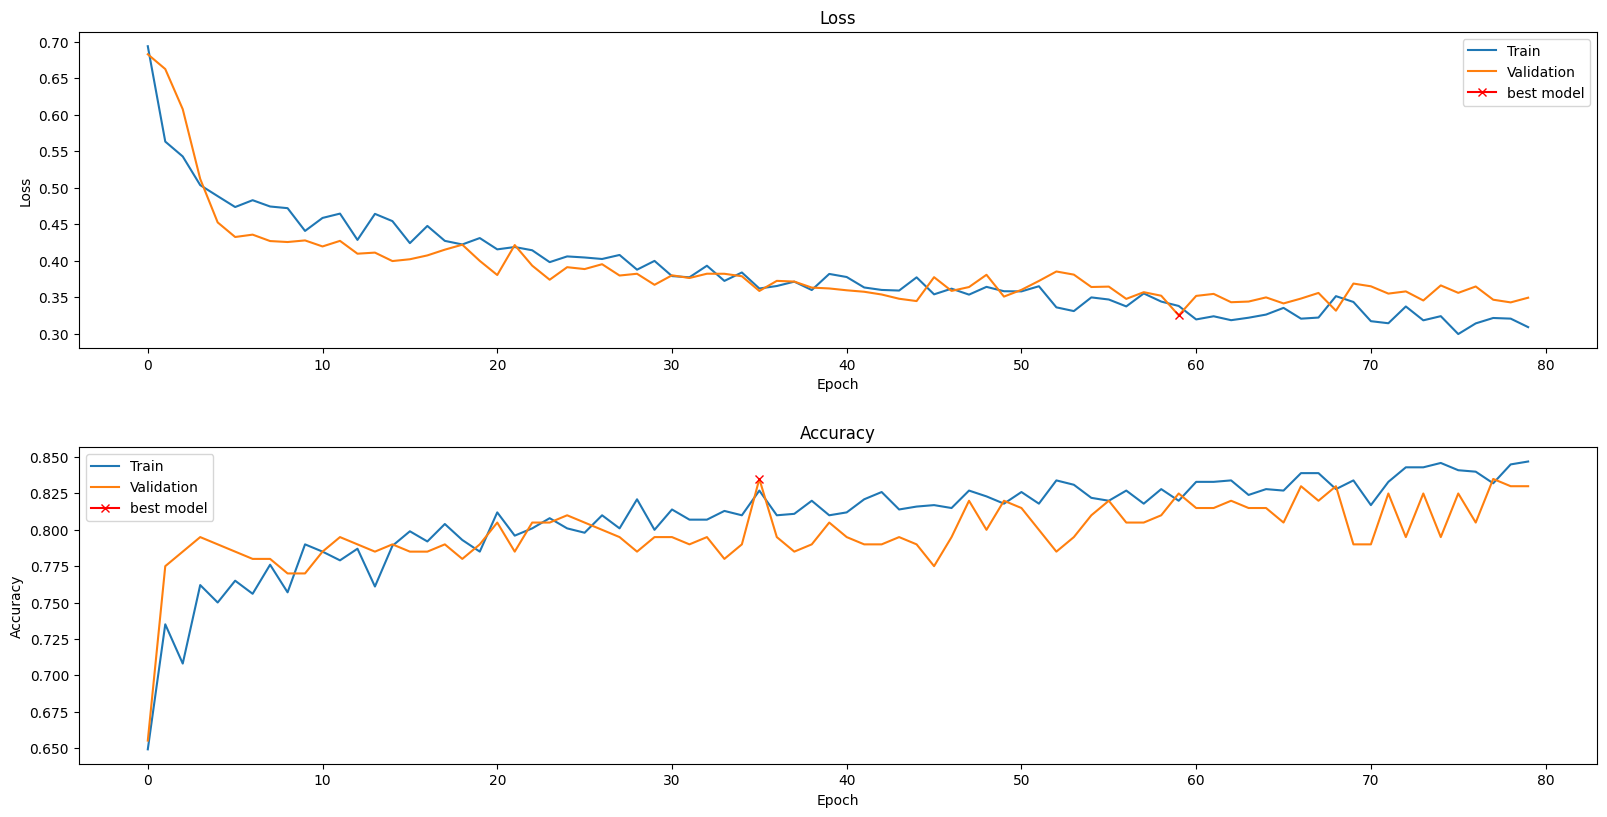

In [10]:
# 9)Learning curve plots
Plots.plotLossAccuracy(model_hist.history)